# Oversikt over alle filmene fra 1980 - 2022 sin avkastning i forhold til inflasjonen

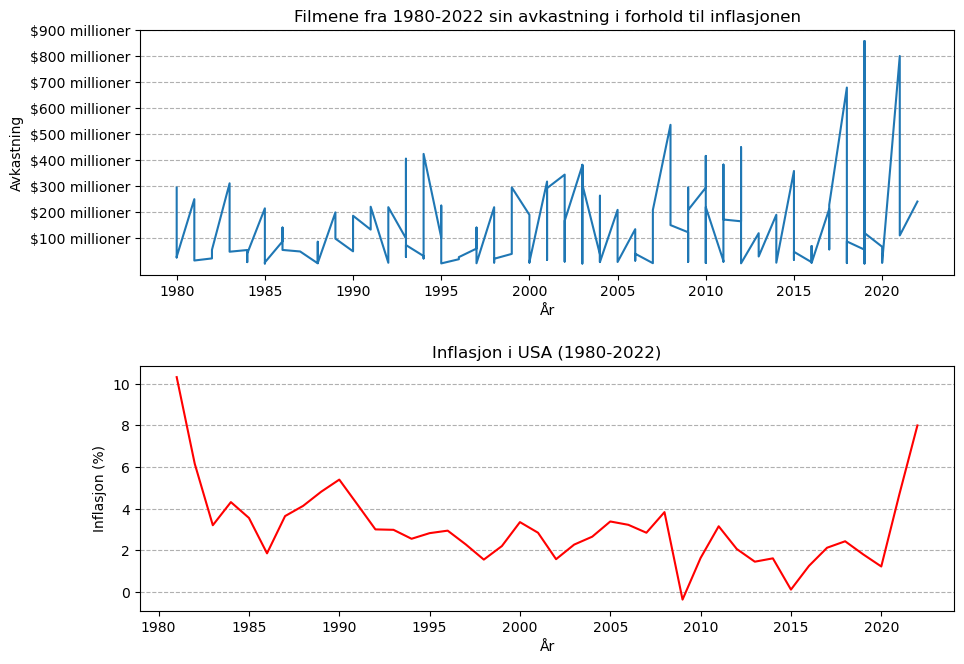

In [2]:
# -*- coding: utf-8 -*-

import json
import csv
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10,7))

# Avkastning

filename = "movies-250.json"

with open(filename, encoding="utf-8") as file:
    data = json.load(file)

aarstall = []
avkastning = []
film_dict = {}


# Oppretter en liste med egendefinerte navn på verdiene på x-aksen
y_labels = [f"${i} millioner" for i in np.arange(100, 1000, step=100)]


for movie in data["movies"]:
    if int(movie["Year"]) >= 1980:
        title = movie["Title"]
        # Sjekker om avkastningsverdien er 'N/A' før konvertering
        if movie["BoxOffice"] != 'N/A':
            box_office = float(movie["BoxOffice"].replace('$', '').replace(',', ''))
        info_arr = [int(movie["Year"]), box_office]
        film_dict[title] = info_arr


# Sorterer dictionaryen basert på avkastning
sorted_dict = sorted(film_dict.items(), key=lambda x: x[1][0])
#print(sorted_dict)

for movie in sorted_dict:
    aarstall.append(movie[1][0])
    avkastning.append(movie[1][1])

plt.subplot(2,1,1)
plt.plot(aarstall, avkastning)
plt.xlabel("År")
plt.xticks(np.arange(1980, 2023, step=5))
plt.ylabel("Avkastning")
# Bruker de egendefinerte y-akse etikettene
plt.yticks(np.arange(100000000, 1000000000, step=100000000), y_labels)
plt.title("Filmene fra 1980-2022 sin avkastning i forhold til inflasjonen")
plt.grid(axis="y", linestyle='--')



# Inflasjon

# Åpner og leser CSV-filen
with open('inflasjon.csv', newline='') as csvfile:
    data = csv.DictReader(csvfile, delimiter=';')
    
    # Hopper over første linja
    overskrifter = next(data)
    
    year = []
    inflation = []

    # Leser data fra CSV-filen og lagrer i listene
    for row in data:
        year.append(int(row['year']))
        inflation.append(float(row['inflation'].replace('%', ' ')))


plt.subplot(2,1,2)
plt.plot(year, inflation, color='red')
plt.xlabel('År')
plt.ylabel('Inflasjon (%)')
plt.title('Inflasjon i USA (1980-2022)')
plt.xticks(np.arange(1980, 2023, step=5))
plt.grid(axis='y', linestyle='--')

plt.tight_layout(pad = 2)

# Viser diagrammene
plt.show()

# Sammenligning av de ulike nettsidenes rating

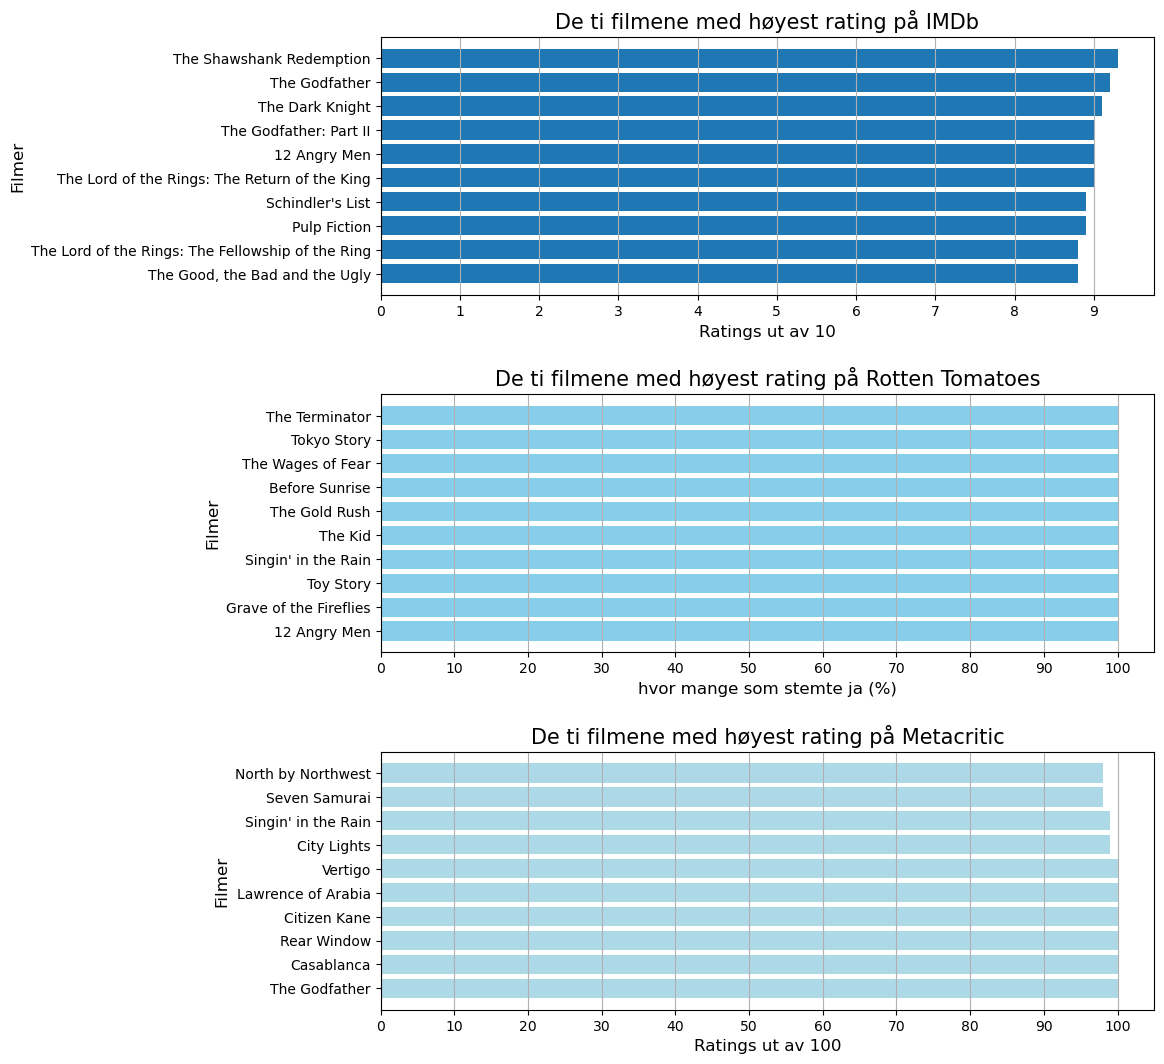

In [3]:
# -*- coding: utf-8 -*-

import json
import matplotlib.pyplot as plt
import numpy as np


filename = "movies-250.json"


with open(filename, encoding="utf-8") as file:
    data = json.load(file)



filmtitler_imdb = []
anmeldelser_imdb = []
film_dict_imdb = {}

filmtitler_RT = []
anmeldelser_RT = []
film_dict_RT = {}

filmtitler_metacritic = []
anmeldelser_metacritic = []
film_dict_metacritic = {}

for filmer in data["movies"]:
    title = filmer["Title"]
    ratings = filmer["Ratings"]

    for rating in ratings:
        if rating["Source"] == "Internet Movie Database":
            film_dict_imdb[title] = float(rating["Value"].replace("/10", ""))
        elif rating["Source"] == "Rotten Tomatoes":
            film_dict_RT[title] = int(rating["Value"].replace("%",""))
        elif rating["Source"] == "Metacritic":
            film_dict_metacritic[title]=int(rating["Value"].replace("/100", ""))

sorted_dict_imdb = sorted(film_dict_imdb.items(), key=lambda x: float(x[1]), reverse=True)

sorted_dict_RT = sorted(film_dict_RT.items(), key=lambda x: int(x[1]), reverse=True)

sorted_dict_metacritic = sorted(film_dict_metacritic.items(), key=lambda x: int(x[1]), reverse=True)

for movie in sorted_dict_imdb:
    filmtitler_imdb.append(movie[0])
    anmeldelser_imdb.append(movie[1])

for movie in sorted_dict_RT:
    filmtitler_RT.append(movie[0])
    anmeldelser_RT.append(movie[1])

for movie in sorted_dict_metacritic:
    filmtitler_metacritic.append(movie[0])
    anmeldelser_metacritic.append(movie[1])

# Sett størrelsen på figuren
fig2 = plt.figure(figsize=(12, 11))


# IMDb
plt.subplot(3, 1, 1)
plt.title("De ti filmene med høyest rating på IMDb", fontsize=15)
plt.grid(axis="x")
plt.xlabel("Ratings ut av 10", fontsize=12)
plt.ylabel("Filmer", fontsize=12)
plt.xticks(np.arange(0, 11, step=1))
plt.barh(filmtitler_imdb[:10][::-1], anmeldelser_imdb[:10][::-1])

# Rotten tomatoes
plt.subplot(3, 1, 2)
plt.title("De ti filmene med høyest rating på Rotten Tomatoes", fontsize=15)
plt.grid(axis="x")
plt.xlabel("hvor mange som stemte ja (%)", fontsize=12)
plt.ylabel("Filmer", fontsize=12)
plt.xticks(np.arange(0, 110, step=10))
plt.barh(filmtitler_RT[:10], anmeldelser_RT[:10], color="skyblue")

# Metacritic
plt.subplot(3, 1, 3)
plt.title("De ti filmene med høyest rating på Metacritic", fontsize=15)
plt.grid(axis="x")
plt.xlabel("Ratings ut av 100", fontsize=12)
plt.ylabel("Filmer", fontsize=12)
plt.xticks(np.arange(0, 110, step=10))
plt.barh(filmtitler_metacritic[:10], anmeldelser_metacritic[:10], color="lightblue")

plt.tight_layout(pad=2)
plt.show()

# Hvordan anmeldelsene fungerer fra de ulike nettsidene

imdB:
Brukere angir en anmeldelse som en verdi fra 1 til 10, den samlede verdien blir vist som filmens score. 

 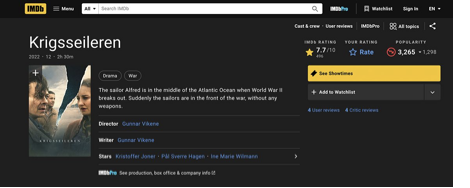



Rotten Tomatoes:
Her gir man en tilbakemelding ved å stemme tommel opp eller tommel ned på filmen. Ut ifra hvor mage tommel opp, eller tommer ned filmen har fått, får den tildelt rotten, fresh eller certified fresh.


Dette er fra kritikere:

 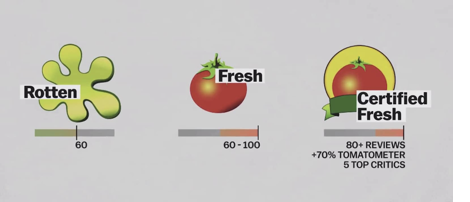


Dette er ikonene som brukes for audience score:

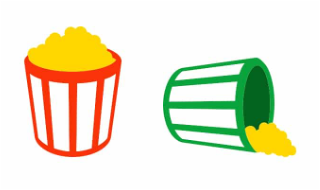
Minst 60% av brukere stemte positivt (rød bøtte)
Mindre en 60% av brukere stemte positivt (grønn veltet bøtte)


Eksempler på hvordan det kan se ut for en film. («verified ratings» er de som har kjøpt billett)

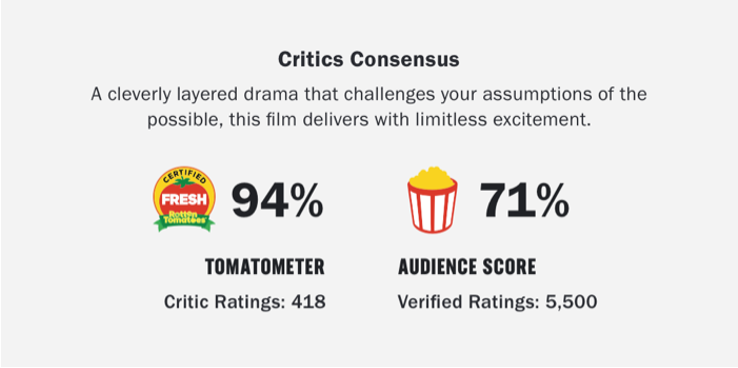

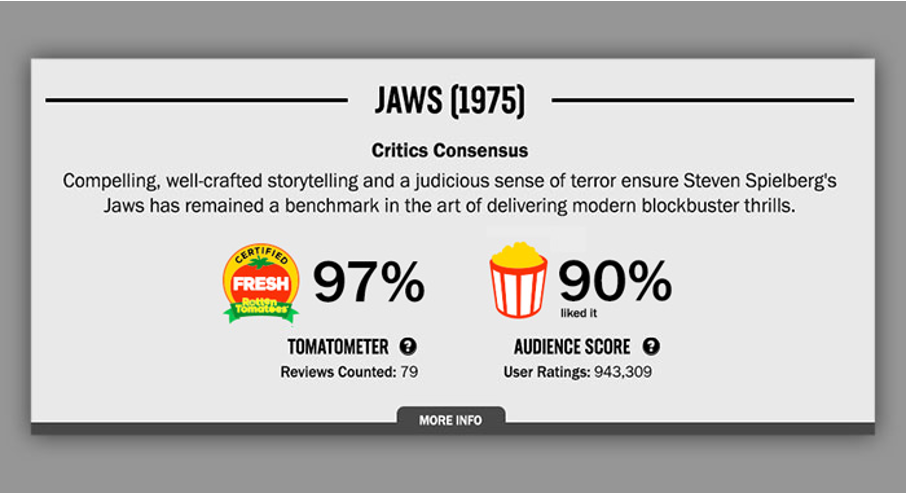

(«User ratings» er at de som er vurderinger fra personer uavhengig om det kan bekreftes at de har sett filmen eller serien)



Metacritic:
Anmeldelser fra kritikere får en poengscore. Gjennomsnittet av disse poengsummene blir en samlet verdi, kalt metascore.  Før det beregnes gjennomsnitt, blir poengsummene vektet i henhold til en kritikers popularitet, status og antall anmeldelser. Nettstedet gir et utdrag fra hver anmeldelse og hyperkoblinger til kilden. En farge grønn, gul eller rød oppsummerer kritikernes anmeldelser.

 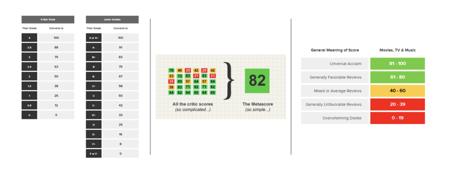
 

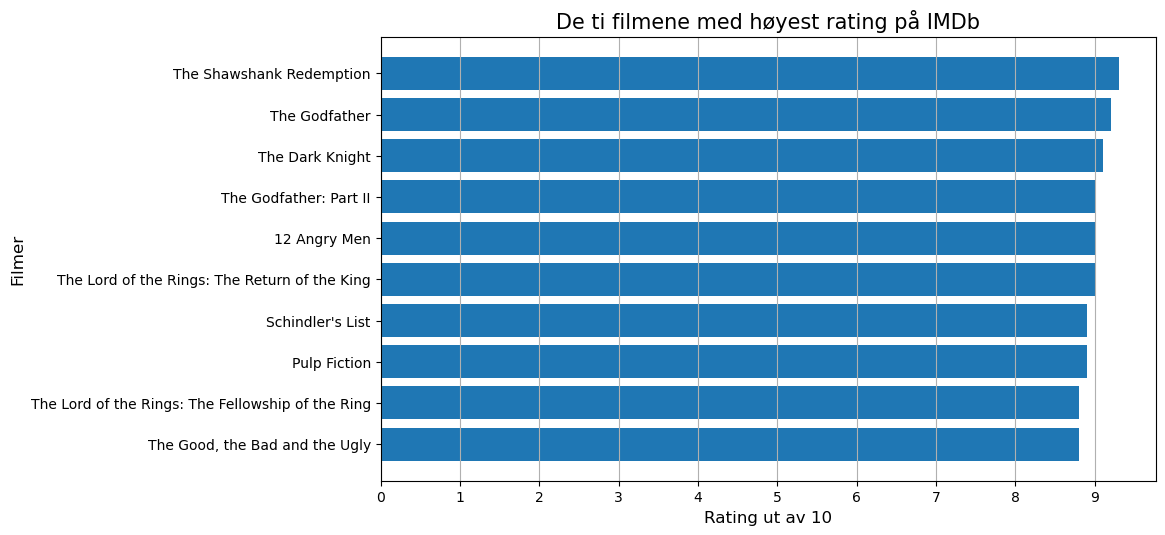


Film                                              |  Antall stemmer
-------------------------------------------------------------------
The Shawshank Redemption                          |         2559562
-------------------------------------------------------------------
The Dark Knight                                   |         2528462
-------------------------------------------------------------------
Inception                                         |         2251332
-------------------------------------------------------------------
Fight Club                                        |         2014670
-------------------------------------------------------------------
Forrest Gump                                      |         1979273
-------------------------------------------------------------------
Pulp Fiction                                      |         1969677
-------------------------------------------------------------------
The Matrix                                     

In [4]:
# -*- coding: utf-8 -*-

import json
import matplotlib.pyplot as plt
import numpy as np

filename = "movies-250.json"

with open(filename, encoding="utf-8") as file:
  data = json.load(file)

filmtitler = []
anmeldelser = []
film_dict_imdb = {}
votes_dict = {}
votes = []

for filmer in data["movies"]:
    film_dict_imdb[filmer["Title"]]=filmer["imdbRating"]
    votes_dict[filmer["Title"]] = filmer["imdbVotes"].replace(",","")

#høyeste
sorted_dict_imdb = sorted(film_dict_imdb.items(), key=lambda x: float(x[1]), reverse=True)

sorted_dict_votes = sorted(votes_dict.items(), key=lambda x: int(x[1]), reverse=True)

#print(sorted_dict_votes[:10])

#høyeste
for movie in sorted_dict_imdb:
    filmtitler.append(movie[0])
    anmeldelser.append(float(movie[1]))

for movie in sorted_dict_votes:
    votes.append(movie[1])
print()

fig3 = plt.figure(figsize=(10, 3))

#Diagram 1
plt.title("De ti filmene med høyest rating på IMDb", fontsize=15)
plt.grid(axis="x")
plt.xticks(np.arange(0, 11, step=1))
plt.xlabel("Rating ut av 10", fontsize=12)
plt.ylabel("Filmer", fontsize=12)
plt.subplots_adjust(bottom=-0.6)
plt.barh(filmtitler[:10][::-1], anmeldelser[:10][::-1])
plt.show()

print()

#Tabell
print("Film                                              |  Antall stemmer")
print("-------------------------------------------------------------------")

# Skriv ut tabellradene for de ti filmene med høyest IMDb-rating
for movie, vote in sorted_dict_votes[:10]:
    print(f"{movie.ljust(50)}| {vote.rjust(15)}")
    print("-------------------------------------------------------------------")

# Kilder:
- https://www.rottentomatoes.com/about
- https://www.w3schools.com/python/python_lambda.asp
- https://www.w3schools.com/python/matplotlib_subplot.asp